ConversionError: Failed to convert value(s) to axis units: Index(['목', '수', '화', '금', '월', '토', '일'], dtype='object', name='요일')

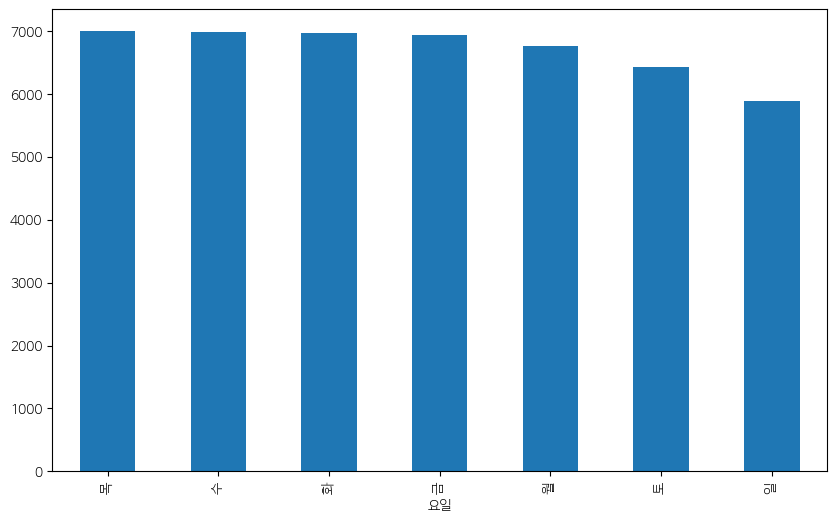

In [33]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# 요일을 한국어로 매핑하는 딕셔너리
WEEK_KOR = {0: "월", 1: "화", 2: "수", 3: "목", 4: "금", 5: "토", 6: "일"}

def load_csv(path: str) -> pd.DataFrame:
    """pandas를 이용하여 path의 데이터를 DataFrame의 형태로 반환합니다."""
    df = pd.read_csv(path)
    return df

def cvt_to_datetime(df: pd.DataFrame) -> pd.DataFrame:
    """df의 DateTime 칼럼을 datetime 형태로 변환합니다."""
    df['DateTime'] = pd.to_datetime(df['DateTime'])
    return df

def add_dayofweek(df: pd.DataFrame) -> pd.DataFrame:
    """df에 DateTime 칼럼의 요일이 저장된 '요일' 칼럼을 새로 추가합니다."""
    df['요일'] = df['DateTime'].dt.weekday.map(WEEK_KOR)
    return df

def get_mean_consumption(df: pd.DataFrame) -> pd.Series:
    """df의 요일별 전력 소비량의 평균을 구하여 반환합니다."""
    mean_consumption = df.groupby('요일')['Consumption'].mean()
    return mean_consumption

def plot_consumption(mean_consumption: pd.Series):
    """요일별 전력 소비량의 평균을 그래프로 그립니다."""
    # 내림차순으로 정렬
    sorted_mean = mean_consumption.sort_values(ascending=False)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    sorted_mean.plot(kind='bar', ax=ax)
    
    # x축 레이블 회전 및 정렬
    ax.set_xticks(sorted_mean.index)
    ax.set_xticklabels(sorted_mean.index.map(WEEK_KOR), rotation=45, ha='right')
    
    # 제목 및 레이블 설정
    ax.set_title('요일별 전력 소비량 평균')
    ax.set_xlabel('요일')
    ax.set_ylabel('전력 소비량')
    
    # 그래프 출력
    plt.tight_layout()
    plt.show()

def main():
    # 데이터 경로
    data_path = "data/electronic.csv"
    
    # 데이터 불러오기
    df = load_csv(data_path)
    
    # DateTime 칼럼을 datetime 형태로 변환
    df = cvt_to_datetime(df)
    
    # 요일 칼럼 추가
    df = add_dayofweek(df)
    
    # 요일별 전력 소비량의 평균 구하기
    mean_consumption = get_mean_consumption(df)
    
    # 그래프 그리기
    plot_consumption(mean_consumption)

if __name__ == "__main__":
    main()


In [32]:
def plot_consumption(mean_consumption: pd.Series):
    """요일별 전력 소비량의 평균을 그래프로 그립니다."""
    # 내림차순으로 정렬
    sorted_mean = mean_consumption.sort_values(ascending=False)
    
    # 그래프 그리기
    fig, ax = plt.subplots(figsize=(10, 6))
    sorted_mean.plot(kind='bar', ax=ax)
    
    # x축 눈금 설정
    ax.set_xticks(sorted_mean.index)
    
    # x축 레이블 설정
    ax.set_xticklabels(sorted_mean.index.map(WEEK_KOR), rotation=45, ha='right')
    
    # 제목 및 레이블 설정
    ax.set_title('요일별 전력 소비량 평균')
    ax.set_xlabel('요일')
    ax.set_ylabel('전력 소비량')
    
    # 그래프 출력
    plt.tight_layout()
    plt.show()
